In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Store Visit 
F1_cleaned

In [10]:
#Caricamento file CSV F1
df = pd.read_csv(r'g:\Il mio Drive\CV\DPV application\DPV prova\Prova\Data\Stores_visit_data\F1.csv', sep=';')
df.head()

,id_visita,data_visita,ora_visita_dal,ora_visita_al,durata_visita,cod_,stato_visita,note_visita_nulla,gruppo,casamadre,ragione_sociale_pdv,insegna_pdv,indirizzo_pdv,cap_pdv,comune_pdv,prov_pdv,regione_pdv,frequenza
0,11293591,24/07/2024 12:27:55,11:48:00.577,12:27:54.883,39.0,C2728,Validato,NaN,NaN,NaN,MIGROSS,MIGROSS SUPERSTORE,VIA OSTERIA GRANDE 49,37066,SOMMACAMPAGNA,VR,Veneto,56
1,11294236,08/11/2024 16:28:57,14:25:49.443,16:28:57.143,123.0,C5207,Validato,NaN,NaN,NaN,D/36 ROSETO - NAZIONALE SUD,OASI,VIA NAZIONALE SUD 621,64026,ROSETO DEGLI ABRUZZI,TE,Abruzzo,56
2,11628150,08/11/2024 15:46:36,15:41:24.930,15:46:35.647,5.0,C3901,Validato,NaN,NaN,NaN,LE QUADRE 2,CONAD,VIA DEL PERO 2,25039,TRAVAGLIATO,BS,Lombardia,56
3,11676746,28/10/2024 10:43:48,10:41:56.487,10:43:47.867,2.0,C6702,Validato,NaN,NaN,NaN,RCLS DI GALA GIACOMO,SIGMA,VIA CASTEL BELVEDERE 135,80016,MARANO DI NAPOLI,NaN,Campania,999
4,11730389,NaN,NaN,NaN,NaN,C7033,In Compilazione Off-Line,NaN,NaN,NaN,MEGAGEST,DOK,VIA MONSIGNOR FARINA MARIA 13,71100,FOGGIA,FG,Puglia,56


In [11]:
#Controllo eventuali valori nulli e coerenza dei Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8273 entries, 0 to 8272
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_visita            8273 non-null   int64  
 1   data_visita          4999 non-null   object 
 2   ora_visita_dal       5038 non-null   object 
 3   ora_visita_al        4999 non-null   object 
 4   durata_visita        4999 non-null   float64
 5   cod_                 8261 non-null   object 
 6   stato_visita         8273 non-null   object 
 7   note_visita_nulla    0 non-null      float64
 8   gruppo               0 non-null      float64
 9   casamadre            0 non-null      float64
 10  ragione_sociale_pdv  8273 non-null   object 
 11  insegna_pdv          8273 non-null   object 
 12  indirizzo_pdv        8273 non-null   object 
 13  cap_pdv              8273 non-null   int64  
 14  comune_pdv           8273 non-null   object 
 15  prov_pdv             7792 non-null   o

In [12]:
#Trasformazione colonne data e ora in formato datetime
df['data_visita'] = pd.to_datetime(
    df['data_visita'], 
    format='%d/%m/%Y %H:%M:%S'
)


df['ora_visita_dal'] = pd.to_datetime(
    df['ora_visita_dal'],
    format='%H:%M:%S.%f',
    errors='coerce'
).dt.time

df['ora_visita_al'] = pd.to_datetime(
    df['ora_visita_al'],
    format='%H:%M:%S.%f',
    errors='coerce'
).dt.time


In [13]:
df['durata_visita'] = df['durata_visita'].astype('Int64')

In [14]:
#Sostituzione dei valori NaN nella colonna 'prov_pdv' con 'NA' in quanto provincia di Napoli
df['prov_pdv'].fillna('NA', inplace=True)
df[df['prov_pdv'] == 'NA']

C:\Users\fefed\AppData\Local\Temp\ipykernel_22716\1635845718.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prov_pdv'].fillna('NA', inplace=True)


,id_visita,data_visita,ora_visita_dal,ora_visita_al,durata_visita,cod_,stato_visita,note_visita_nulla,gruppo,casamadre,ragione_sociale_pdv,insegna_pdv,indirizzo_pdv,cap_pdv,comune_pdv,prov_pdv,regione_pdv,frequenza
3,11676746,2024-10-28 10:43:48,10:41:56.487000,10:43:47.867000,2,C6702,Validato,NaN,NaN,NaN,RCLS DI GALA GIACOMO,SIGMA,VIA CASTEL BELVEDERE 135,80016,MARANO DI NAPOLI,NA,Campania,999
17,11293992,2024-09-20 10:25:12,10:17:08.923000,10:25:11.687000,8,C6700,Validato,NaN,NaN,NaN,DS INVEST,DECO' MARKET,VIA VIRGILIO 2/4,80078,POZZUOLI,NA,Campania,56
35,11519547,2024-11-11 11:15:14,11:02:34.347000,11:15:13.677000,13,C6700,Validato,NaN,NaN,NaN,PASI,FLOR DO CAFE',VIA GIACOMO LEOPARDI 76,80126,NAPOLI,NA,Campania,56
59,11292144,NaT,NaT,NaT,<NA>,C6700,Pronto per Compilazione,NaN,NaN,NaN,CENTRO CONVENIENZAERATIVA,DECO' SUPERMERCATI,VIA TAVERNANOVA 79,80033,CICCIANO,NA,Campania,999
76,11581457,2024-11-25 17:42:39,17:00:15.527000,17:42:38.713000,42,C6700,Validato,NaN,NaN,NaN,S.E.P.,DECO' SUPERMERCATI,VIA NUOVA TOSCANELLA 58,80145,NAPOLI,NA,Campania,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,11292768,2024-10-24 11:36:36,10:41:06.183000,11:36:36.350000,55,C6702,Validato,NaN,NaN,NaN,DORAISABEL DI GIOVANNI DE ROSA E C,OK SIGMA,VIA DEL LAVINAIO 138,80142,NAPOLI,NA,Campania,56
8219,11293942,NaT,NaT,NaT,<NA>,C6708,Pronto per Compilazione,NaN,NaN,NaN,F.LLI VERGARA,SISA,VIA GIUSEPPE DI VITTORIO 91,80029,SANT'ANTIMO,NA,Campania,999
8235,11294309,NaT,NaT,NaT,<NA>,C6702,Punto Vendita Disattivato,NaN,NaN,NaN,TURCO & CO.,SIGMA,VIA ENRICO FERMI 234,80010,VILLARICCA,NA,Campania,999
8245,11293589,NaT,NaT,NaT,<NA>,C4912,Pronto per Compilazione,NaN,NaN,NaN,GALEOTAFIORE,CONAD,VIA NAZIONALE DELLE PUGLIE 53,80032,CASAMARCIANO,NA,Campania,999


In [15]:
df[df['cod_'].isna()]

,id_visita,data_visita,ora_visita_dal,ora_visita_al,durata_visita,cod_,stato_visita,note_visita_nulla,gruppo,casamadre,ragione_sociale_pdv,insegna_pdv,indirizzo_pdv,cap_pdv,comune_pdv,prov_pdv,regione_pdv,frequenza
935,11293820,NaT,NaT,NaT,<NA>,NaN,Pronto per Compilazione,NaN,NaN,NaN,PRIX QUALITY,PRIX DISCOUNT,VIA ROVIGO 52,36071,ARZIGNANO,VI,Veneto,56
1535,11294243,NaT,NaT,NaT,<NA>,NaN,Pronto per Compilazione,NaN,NaN,NaN,COMMERCIALE ENNETI SRL,N. D.,VIA TAGLIAMENTO 1/3,36031,DUEVILLE,VI,Veneto,56
1731,11295351,NaT,NaT,NaT,<NA>,NaN,Punto Vendita Disattivato,NaN,NaN,NaN,PAM PANORAMA,PAM,VIA PADOVA 111,20127,MILANO,MI,Lombardia,999
3718,11288205,NaT,NaT,NaT,<NA>,NaN,In Compilazione Off-Line,NaN,NaN,NaN,RAGIONE SOCIALE,INSEGNA,VIA PISTOIA 26,10144,TORINO,TO,Piemonte,56
4576,11294346,NaT,NaT,NaT,<NA>,NaN,Pronto per Compilazione,NaN,NaN,NaN,FABRIZIO,D'URBANO,VIA FERDINANDO MARTINI 14,54100,MASSA,MS,Toscana,999
4692,11295283,NaT,11:51:38.367000,NaT,<NA>,NaN,In Compilazione Off-Line,NaN,NaN,NaN,NEW VISION SRL,CONAD,VIA DUCHESSA DI GALLIERA,15076,OVADA,AL,Piemonte,999
5236,11294993,NaT,NaT,NaT,<NA>,NaN,Pronto per Compilazione,NaN,NaN,NaN,PRIX QUALITY,PRIX DISCOUNT,VIA BARCO 40,36030,CALDOGNO,VI,Veneto,56
6042,11294671,NaT,NaT,NaT,<NA>,NaN,Pronto per Compilazione,NaN,NaN,NaN,G.& B.,MAXI' SUPERSTORE,VIA VERLATO 11/13,36030,VILLAVERLA,VI,Veneto,56
6055,11295203,NaT,NaT,NaT,<NA>,NaN,Pronto per Compilazione,NaN,NaN,NaN,BONTA' ALIMENTARI,N. D.,VIA G. MARCONI 2,36027,ROSA',VI,Veneto,56
6629,11293422,NaT,NaT,NaT,<NA>,NaN,Pronto per Compilazione,NaN,NaN,NaN,SUPERMERCATI STELLA,STELLA SUPERMERCATI,VIA CHIUSE 16,36070,CASTELGOMBERTO,VI,Veneto,56


In [16]:
df['stato_visita'].unique()

array(['Validato', 'In Compilazione Off-Line', 'Pronto per Compilazione',
       'Punto Vendita Disattivato', 'Compilato', 'Da Cancellare'],
      dtype=object)

count         4999.0
mean      654.071414
std      4749.970793
min         -43011.0
25%             20.0
50%             50.0
75%            307.0
max         142711.0
Name: durata_visita, dtype: Float64


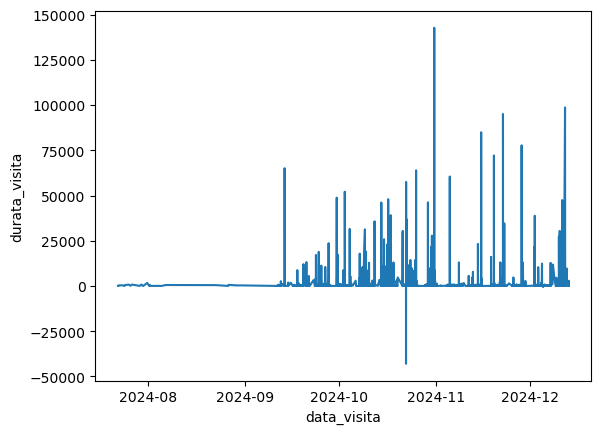

In [17]:
#Controllo eventuali ambiguità nel calcolo della durata visita
print(df['durata_visita'].describe())
sns.lineplot(data=df, x='data_visita', y='durata_visita')
plt.show()

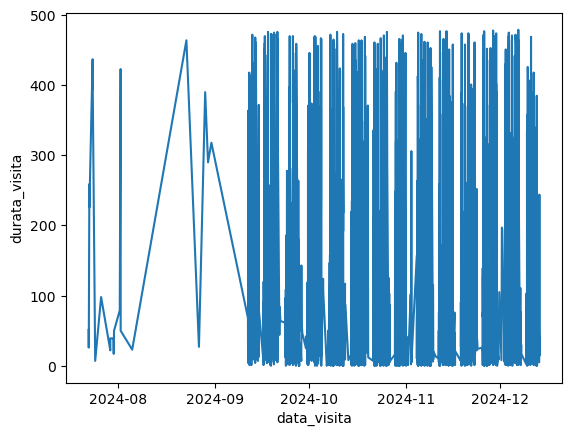

In [18]:
#tolgo gli outlier positivi e negativi, mantengo i nulli
df['durata_visita'] = df['durata_visita'].fillna(0)
df = df[df['durata_visita'] >= 0]
df = df[df['durata_visita'] <= 480 ]  #8 ore max
sns.lineplot(data=df, x='data_visita', y='durata_visita')
plt.show()


In [19]:
# aggiungo colonna per identificare univocamente i negozi
df['store_id'] = (
	df.groupby(['comune_pdv', 'indirizzo_pdv', 'insegna_pdv', 'prov_pdv', 'cap_pdv', 'ragione_sociale_pdv'])
	.ngroup()
    .add(1)
	.astype('Int64')
)

In [20]:
# trovo il numero di visite per ogni store_id per focalizzarmici in power bi
df[['store_id', 'prov_pdv']].value_counts()

store_id  prov_pdv
1891      BG          25
941       BG          22
1415      BS          21
2856      BG          19
436       MB          16
                      ..
3257      VI           1
3263      CB           1
50        SV           1
20        IS           1
22        AG           1
Name: count, Length: 3293, dtype: int64

In [21]:
df.sort_values(by='store_id', ascending=True)

,id_visita,data_visita,ora_visita_dal,ora_visita_al,durata_visita,cod_,stato_visita,note_visita_nulla,gruppo,casamadre,ragione_sociale_pdv,insegna_pdv,indirizzo_pdv,cap_pdv,comune_pdv,prov_pdv,regione_pdv,frequenza,store_id
8166,11293699,2024-10-09 11:59:05,11:21:30.340000,11:59:05.213000,38,C2000,Validato,NaN,NaN,NaN,ASPIAG SERVICE,INTERSPAR,PIAZZALE MICHELANGELO 40,35031,ABANO TERME,PD,Veneto,28,1
7213,11615317,NaT,NaT,NaT,0,C2000,In Compilazione Off-Line,NaN,NaN,NaN,ASPIAG SERVICE,INTERSPAR,PIAZZALE MICHELANGELO 40,35031,ABANO TERME,PD,Veneto,28,1
3057,11295104,2024-10-09 12:39:31,12:22:20.227000,12:39:31.477000,17,C2304,Validato,NaN,NaN,NaN,ALI',ALIPER,VIA PREVITALI 80,35031,ABANO TERME,PD,Veneto,56,2
2751,11615329,NaT,NaT,NaT,0,C2304,In Compilazione Off-Line,NaN,NaN,NaN,ALI',ALIPER,VIA PREVITALI 80,35031,ABANO TERME,PD,Veneto,56,2
3582,11294304,NaT,NaT,NaT,0,C4914,Pronto per Compilazione,NaN,NaN,NaN,CENTRO COMMERCIALE LA MASCHERA,CONAD SUPERSTORE,CORSO ITALIA 126,80011,ACERRA,NA,Campania,999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,11293733,2024-09-23 09:48:31,09:34:13.863000,09:48:31.483000,14,C3208,Validato,NaN,NaN,NaN,COOP ADRIATICA,COOP,VIA DELLE OFFICINE 27,40069,ZOLA PREDOSA,BO,Emilia Romagna,56,3291
5499,11842811,NaT,NaT,NaT,0,C3208,In Compilazione Off-Line,NaN,NaN,NaN,COOP ADRIATICA,COOP,VIA DELLE OFFICINE 27,40069,ZOLA PREDOSA,BO,Emilia Romagna,56,3291
3194,11550093,2024-11-27 10:14:33,09:56:39.723000,10:14:33.427000,18,C3208,Validato,NaN,NaN,NaN,COOP ADRIATICA,COOP,VIA DELLE OFFICINE 27,40069,ZOLA PREDOSA,BO,Emilia Romagna,56,3291
7253,11293474,NaT,NaT,NaT,0,C3400,In Compilazione Off-Line,NaN,NaN,NaN,SUPERMERCATO ZOPPOLA DI ORTOLAN,CONAD CITY,VIA PANCERA 102,33080,ZOPPOLA,PN,Friuli Venezia Giulia,56,3292


In [22]:
#Verifico nomenclatura regioni
df['regione_pdv'].unique()

array(['Veneto', 'Abruzzo', 'Lombardia', 'Campania', 'Puglia', 'Sardegna',
       'Toscana', 'Umbria', 'Emilia Romagna', 'Lazio', 'Marche',
       'Piemonte', 'Friuli Venezia Giulia', 'Sicilia', 'Liguria',
       'Calabria', 'Molise', "Valle d'Aosta", 'Trentino Alto Adige',
       'Basilicata', 'RSM'], dtype=object)

In [23]:
#sostituisco i nomi delle regioni con la nomenclatura completa per visuali power bi
df['regione_pdv'].replace({
    'RSM' : 'San Marino',
    'Trentino Alto Adige' : 'Trentino-Alto Adige',
    },
    inplace=True)

C:\Users\fefed\AppData\Local\Temp\ipykernel_22716\4016727514.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['regione_pdv'].replace({


In [24]:
#esporto il file pulito in csv (F1_cleaned.csv)
df.to_csv(r'g:\Il mio Drive\CV\DPV application\DPV prova\Prova\Python\F1_cleaned.csv', index=False)

# Retail Execution
Prodotti_clean.csv

In [25]:
# Caricamento multiplo file CSV da cartella ed aggiunta colonna con nome file di origine per distinguere la provenienza ed elimino righe duplicate interne ad ogni file
import glob

path = r'G:\Il mio Drive\CV\DPV application\DPV prova\Prova\Data\Products_data\*.csv'

files = glob.glob(path)

lista_df = []

print(f"File trovati nella cartella: {len(files)}")

for f in files:
    try:
        nome_file = os.path.basename(f)

        df_temp = pd.read_csv(
            f,
            sep=None,
            engine='python',
            encoding='latin1'
        )

        df_temp = df_temp.drop_duplicates()

        df_temp['origine_file'] = nome_file
        
        lista_df.append(df_temp)
        print(f"Caricato: {nome_file} | Righe dopo deduplica: {len(df_temp)}")
        
    except Exception as e:
        print(f"Errore nel caricamento di {f}: {e}")

if lista_df:
    df_totale = pd.concat(lista_df, ignore_index=True)
    print(f"\nRighe totali dopo concatenazione: {len(df_totale)}")
else:
    print("Nessun file CSV trovato o caricato.")


File trovati nella cartella: 6
Caricato: file uscita.csv | Righe dopo deduplica: 1402803
Caricato: Out.csv | Righe dopo deduplica: 1057118
Caricato: Out67.csv | Righe dopo deduplica: 311026
Caricato: Output.csv | Righe dopo deduplica: 982809
Caricato: Output45.csv | Righe dopo deduplica: 1865425
Caricato: Output7.csv | Righe dopo deduplica: 452323

Righe totali dopo concatenazione: 6071504


In [26]:
dfp = df_totale
dfp.info()
dfp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6071504 entries, 0 to 6071503
Data columns (total 17 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ï»¿CC_Categoria prodotto  object 
 1   ean                       int64  
 2   id                        int64  
 3   condizione                object 
 4   azione                    object 
 5   facing                    float64
 6   a Scaffale                object 
 7   condizione_1              object 
 8   azione_1                  object 
 9   condizione_2              object 
 10  azione_2                  object 
 11  condizione_3              object 
 12  azione_3                  object 
 13  qta_ordinata              float64
 14  qta_giacenza              float64
 15  In_assortimento           int64  
 16  origine_file              object 
dtypes: float64(3), int64(3), object(11)
memory usage: 787.5+ MB


,ï»¿CC_Categoria prodotto,ean,id,condizione,azione,facing,a Scaffale,condizione_1,azione_1,condizione_2,azione_2,condizione_3,azione_3,qta_ordinata,qta_giacenza,In_assortimento,origine_file
0,Categoria 6,2005020,11800004,NP,NaN,0.0,Cartone,NP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,file uscita.csv
1,Categoria 6,2001848,11295145,NP,NaN,0.0,Cartone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,file uscita.csv
2,Categoria 6,2012387,11667240,NP,NaN,0.0,Cartone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,file uscita.csv
3,Categoria 6,9198021,11294859,NP,NaN,0.0,Cartone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,file uscita.csv
4,Categoria 6,9197987,11866808,NP,NaN,0.0,Cartone,NP,NaN,NP,NaN,NP,NaN,NaN,0.0,0,file uscita.csv


In [27]:
dfp.columns

Index(['ï»¿CC_Categoria prodotto', 'ean', 'id ', 'condizione', 'azione',
       'facing', 'a Scaffale', 'condizione_1', 'azione_1', 'condizione_2',
       'azione_2', 'condizione_3', 'azione_3', 'qta_ordinata', 'qta_giacenza',
       'In_assortimento', 'origine_file'],
      dtype='object')

In [28]:
dfp['origine_file'].unique()

array(['file uscita.csv', 'Out.csv', 'Out67.csv', 'Output.csv',
       'Output45.csv', 'Output7.csv'], dtype=object)

In [29]:
#uniformo nome colonna con spazio nel nome
dfp.rename(columns={'a Scaffale': 'a_scaffale'}, inplace=True)

In [30]:
dfp['a_scaffale'].unique()

array(['Cartone', nan, 'Scatola'], dtype=object)

In [31]:
#pulizia valori colonna a_scaffale
dfp['a_scaffale'].fillna('Formato non specificato', inplace=True)
dfp['a_scaffale'].replace({'Cartone' : 'Scatola'}, inplace=True)

C:\Users\fefed\AppData\Local\Temp\ipykernel_22716\344204470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfp['a_scaffale'].fillna('Formato non specificato', inplace=True)


In [32]:
#uniformo nome colonna con caratteri ambigui
dfp.rename(columns={'ï»¿CC_Categoria prodotto': 'categoria prodotto'},inplace=True)

In [33]:
dfp.columns

Index(['categoria prodotto', 'ean', 'id ', 'condizione', 'azione', 'facing',
       'a_scaffale', 'condizione_1', 'azione_1', 'condizione_2', 'azione_2',
       'condizione_3', 'azione_3', 'qta_ordinata', 'qta_giacenza',
       'In_assortimento', 'origine_file'],
      dtype='object')

In [34]:
dfp['categoria prodotto'].unique()

array(['Categoria 6', 'Categoria 9', '4 cat', 'CAT 2', 'cinque ',
       'cat tre', 'CAT1'], dtype=object)

In [35]:
#rinomino i valori della colonna categoria prodotto per uniformarli
dfp['categoria prodotto'].replace(
    {'cinque ' : 'Categoria 5',
     'CAT1': 'Categoria 1',
     'cat tre': 'Categoria 3',
     'Categoria 6': 'Categoria 6',
     'Categoria 9': 'Categoria 9',
     '4 cat': 'Categoria 4',
     'CAT 2': 'Categoria 2'
    },
inplace=True)
dfp['categoria prodotto'].unique()

C:\Users\fefed\AppData\Local\Temp\ipykernel_22716\2686323835.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfp['categoria prodotto'].replace(


array(['Categoria 6', 'Categoria 9', 'Categoria 4', 'Categoria 2',
       'Categoria 5', 'Categoria 3', 'Categoria 1'], dtype=object)

In [36]:
#analisi valori unici delle colonne azione e condizione
print("Unique in 'azione':", dfp['azione'].unique())
print("Unique in 'condizione':", dfp['condizione'].unique())
print("Unique in 'azione_1':", dfp['azione_1'].unique())
print("Unique in 'condizione_1':", dfp['condizione_1'].unique())
print("Unique in 'azione_2':", dfp['azione_2'].unique())
print("Unique in 'condizione_2':", dfp['condizione_2'].unique())
print("Unique in 'azione_3':", dfp['azione_3'].unique())
print("Unique in 'condizione_3':", dfp['condizione_3'].unique())

Unique in 'azione': [nan 'NON IN ASSORTIMENTO' 'OOS - RIORDINO' 'RIORDINO' 'NON IN CLUSTER'
 'CR NON DISPONIBILE' 'MANCA SPAZIO']
Unique in 'condizione': ['NP' nan 'P' 'OOS' 'NON IN ASSORTIMENTO' 'CR NON DISPONIBILE'
 'MANCA SPAZIO']
Unique in 'azione_1': [nan 'NON IN ASSORTIMENTO' 'OOS - RIORDINO' 'RIORDINO' 'NON IN CLUSTER'
 'CR NON DISPONIBILE' 'MANCA SPAZIO']
Unique in 'condizione_1': ['NP' nan 'OOS' 'P' 'NON IN ASSORTIMENTO' 'MANCA SPAZIO'
 'CR NON DISPONIBILE']
Unique in 'azione_2': [nan 'NON IN ASSORTIMENTO' 'RIORDINO' 'NON IN CLUSTER'
 'CR NON DISPONIBILE' 'OOS - RIORDINO' 'MANCA SPAZIO']
Unique in 'condizione_2': [nan 'NP' 'OOS' 'P' 'NON IN ASSORTIMENTO' 'CR NON DISPONIBILE']
Unique in 'azione_3': [nan 'NON IN CLUSTER' 'NON IN ASSORTIMENTO' 'CR NON DISPONIBILE'
 'OOS - RIORDINO' 'RIORDINO' 'MANCA SPAZIO' '0' 0.0]
Unique in 'condizione_3': [nan 'NP' 'P' 'OOS' 'CR NON DISPONIBILE']


In [37]:
#normalizzazione codici azione

dfp['azione'].replace(
    {
        'RIORDINO': 'Riordino',
        'OOS - RIORDINO': 'Riordino',

        'MANCA SPAZIO': 'Layout/Spazio',

        'CR NON DISPONIBILE': 'Problema fornitore',

        'NON IN ASSORTIMENTO': 'Assortimento/Cluster',
        'NON IN CLUSTER': 'Assortimento/Cluster',

        '': 'Nessuna azione',
        None: 'Nessuna azione'
    },
    inplace=True
)

dfp['azione_1'].replace(
    {
        'RIORDINO': 'Riordino',
        'OOS - RIORDINO': 'Riordino',

        'MANCA SPAZIO': 'Layout/Spazio',

        'CR NON DISPONIBILE': 'Problema fornitore',

        'NON IN ASSORTIMENTO': 'Assortimento/Cluster',
        'NON IN CLUSTER': 'Assortimento/Cluster',

        '': 'Nessuna azione',
        None: 'Nessuna azione'
    },
    inplace=True
)

dfp['azione_2'].replace(
    {
        'RIORDINO': 'Riordino',
        'OOS - RIORDINO': 'Riordino',

        'MANCA SPAZIO': 'Layout/Spazio',

        'CR NON DISPONIBILE': 'Problema fornitore',

        'NON IN ASSORTIMENTO': 'Assortimento/Cluster',
        'NON IN CLUSTER': 'Assortimento/Cluster',

        '': 'Nessuna azione',
        None: 'Nessuna azione'
    },
    inplace=True
)

dfp['azione_3'].replace(
    {
        'RIORDINO': 'Riordino',
        'OOS - RIORDINO': 'Riordino',

        'MANCA SPAZIO': 'Layout/Spazio',

        'CR NON DISPONIBILE': 'Problema fornitore',

        'NON IN ASSORTIMENTO': 'Assortimento/Cluster',
        'NON IN CLUSTER': 'Assortimento/Cluster',

        '0': 'Nessuna azione',
        0: 'Nessuna azione',
        '': 'Nessuna azione',
        None: 'Nessuna azione'
    },
    inplace=True
)

#normalizzazione codici condizione

dfp['condizione'].replace(
    {
        'NP': 'Non Presente',
        'P': 'Presente',
        'OOS': 'Out of Stock',
        'NON IN ASSORTIMENTO': 'Non in assortimento',
        'CR NON DISPONIBILE': 'Problema CR',
        'MANCA SPAZIO': 'Mancanza spazio',
        '': 'Non rilevato',
        None: 'Non rilevato'
    },
    inplace=True
)

dfp['condizione_1'].replace(
    {
        'NP': 'Non Presente',
        'P': 'Presente',
        'OOS': 'Out of Stock',
        'NON IN ASSORTIMENTO': 'Non in assortimento',
        'CR NON DISPONIBILE': 'Problema CR',
        'MANCA SPAZIO': 'Mancanza spazio',
        '': 'Non rilevato',
        None: 'Non rilevato'
    },
    inplace=True
)

dfp['condizione_2'].replace(
    {
        'NP': 'Non Presente',
        'P': 'Presente',
        'OOS': 'Out of Stock',
        'NON IN ASSORTIMENTO': 'Non in assortimento',
        'CR NON DISPONIBILE': 'Problema CR',
        'MANCA SPAZIO': 'Mancanza spazio',
        '': 'Non rilevato',
        None: 'Non rilevato'
    },
    inplace=True
)

dfp['condizione_3'].replace(
    {
        'NP': 'Non Presente',
        'P': 'Presente',
        'OOS': 'Out of Stock',
        'CR NON DISPONIBILE': 'Problema CR',
        'MANCA SPAZIO': 'Mancanza spazio',
        '': 'Non rilevato',
        None: 'Non rilevato'
    },
    inplace=True
)


C:\Users\fefed\AppData\Local\Temp\ipykernel_22716\1392122693.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfp['azione'].replace(
C:\Users\fefed\AppData\Local\Temp\ipykernel_22716\1392122693.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [38]:
dfp.sample(20)

,categoria prodotto,ean,id,condizione,azione,facing,a_scaffale,condizione_1,azione_1,condizione_2,azione_2,condizione_3,azione_3,qta_ordinata,qta_giacenza,In_assortimento,origine_file
5979870,Categoria 1,5000007,11295211,Non Presente,Nessuna azione,NaN,Formato non specificato,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,0.0,0.0,0,Output7.csv
1995270,Categoria 4,9125416,11294819,Non Presente,Nessuna azione,0.0,Scatola,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,0.0,0.0,0,Out.csv
3827998,Categoria 3,651,11293970,Non rilevato,Nessuna azione,0.0,Scatola,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,NaN,0.0,0,Output45.csv
2784243,Categoria 5,42047,11294367,Non Presente,Nessuna azione,0.0,Formato non specificato,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,NaN,0.0,0,Output.csv
431185,Categoria 4,9162893,11661125,Non Presente,Nessuna azione,0.0,Scatola,Non Presente,Nessuna azione,Non Presente,Nessuna azione,Non Presente,Nessuna azione,NaN,0.0,0,file uscita.csv
1224358,Categoria 4,9162794,11751680,Presente,Nessuna azione,0.0,Scatola,Presente,Nessuna azione,Non Presente,Nessuna azione,Non rilevato,Nessuna azione,NaN,0.0,1,file uscita.csv
4616634,Categoria 3,668,11293112,Non Presente,Nessuna azione,NaN,Formato non specificato,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,0.0,0.0,0,Output45.csv
2986948,Categoria 5,52053,11775473,Non Presente,Nessuna azione,0.0,Scatola,Non Presente,Nessuna azione,Non Presente,Nessuna azione,Non rilevato,Nessuna azione,NaN,0.0,0,Output.csv
5694857,Categoria 1,5000120,11295216,Non rilevato,Nessuna azione,0.0,Scatola,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,NaN,0.0,0,Output7.csv
3218849,Categoria 5,726,11293669,Non Presente,Nessuna azione,0.0,Scatola,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,NaN,0.0,0,Output.csv


In [39]:
print(dfp['facing'].unique(), dfp['facing'].dtype)

[  0.  nan   2.   3.   1.   4.   5.   6.   9.  16.   7.  26. 252. 269.
 209.  12.   8.  10.  13.  14. 139. 185.  22.  11. 170. 210.  32. 247.
 119. 165.  33. 145.  15. 159. 245.  24. 129. 199. 149. 179.] float64


In [40]:
#cambio dtype colonna facing in intero, sostituisco valori nulli con 0
dfp['facing'] = (
    pd.to_numeric(dfp['facing'], errors='coerce')
    .astype('Int64').fillna(0)
)
dfp['facing'].dtype

Int64Dtype()

In [41]:
#verifico valori colonna qta_ordinata
print(dfp['qta_ordinata'].unique(), dfp['qta_ordinata'].dtype)

[nan  0.] float64


In [42]:
#aggiorno dtype colonna qta_ordinata in intero, sostituisco valori nulli con 0
dfp['qta_ordinata'] = (
    pd.to_numeric(dfp['qta_ordinata'], errors='coerce')
    .astype('Int64').fillna(0)
)
dfp['qta_ordinata'].dtype

Int64Dtype()

In [43]:
#verifico valori colonna qta_giacenza
print(dfp['qta_giacenza'].unique(), dfp['qta_giacenza'].dtype)

[ 0. nan] float64


In [44]:
#aggiorno dtype colonna qta_giacenza in intero, sostituisco valori nulli con 0
dfp['qta_giacenza'] = (
    pd.to_numeric(dfp['qta_giacenza'], errors='coerce')
    .astype('Int64').fillna(0)
)
dfp['qta_giacenza'].dtype

Int64Dtype()

In [45]:
#verifico valori colonna In_assortimento
print(dfp['In_assortimento'].unique(), dfp['In_assortimento'].dtype)

[0 1] int64


In [46]:
dfp.head()

,categoria prodotto,ean,id,condizione,azione,facing,a_scaffale,condizione_1,azione_1,condizione_2,azione_2,condizione_3,azione_3,qta_ordinata,qta_giacenza,In_assortimento,origine_file
0,Categoria 6,2005020,11800004,Non Presente,Nessuna azione,0,Scatola,Non Presente,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,0,0,0,file uscita.csv
1,Categoria 6,2001848,11295145,Non Presente,Nessuna azione,0,Scatola,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,0,0,0,file uscita.csv
2,Categoria 6,2012387,11667240,Non Presente,Nessuna azione,0,Scatola,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,0,0,0,file uscita.csv
3,Categoria 6,9198021,11294859,Non Presente,Nessuna azione,0,Scatola,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,Non rilevato,Nessuna azione,0,0,0,file uscita.csv
4,Categoria 6,9197987,11866808,Non Presente,Nessuna azione,0,Scatola,Non Presente,Nessuna azione,Non Presente,Nessuna azione,Non Presente,Nessuna azione,0,0,0,file uscita.csv


In [47]:
#rimuovo righe duplicate totali
dfp.drop_duplicates(inplace=True)

In [48]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5239083 entries, 0 to 6071503
Data columns (total 17 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   categoria prodotto  object
 1   ean                 int64 
 2   id                  int64 
 3   condizione          object
 4   azione              object
 5   facing              Int64 
 6   a_scaffale          object
 7   condizione_1        object
 8   azione_1            object
 9   condizione_2        object
 10  azione_2            object
 11  condizione_3        object
 12  azione_3            object
 13  qta_ordinata        Int64 
 14  qta_giacenza        Int64 
 15  In_assortimento     int64 
 16  origine_file        object
dtypes: Int64(3), int64(3), object(11)
memory usage: 734.5+ MB


In [49]:
#esporto il file pulito in csv (Prodotti_clean.csv)
dfp.to_csv(r'g:\Il mio Drive\CV\DPV application\DPV prova\Prova\Python\Prodotti_clean.csv', index=False)

# Store geo info 

In [50]:
dfj = pd.read_json(r'g:\Il mio Drive\CV\DPV application\DPV prova\Prova\Data\Stores_data\store_info_large.json')
dfj.head()

,store_id,store_name,location_lat,location_lon
0,1,Store_1,40.876181,19.707227
1,2,Store_2,38.423070,10.901761
2,3,Store_3,44.645546,16.417061
3,4,Store_4,43.520021,11.392790
4,5,Store_5,40.021705,11.745108


In [51]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      1000 non-null   int64  
 1   store_name    1000 non-null   object 
 2   location_lat  1000 non-null   float64
 3   location_lon  1000 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 31.4+ KB


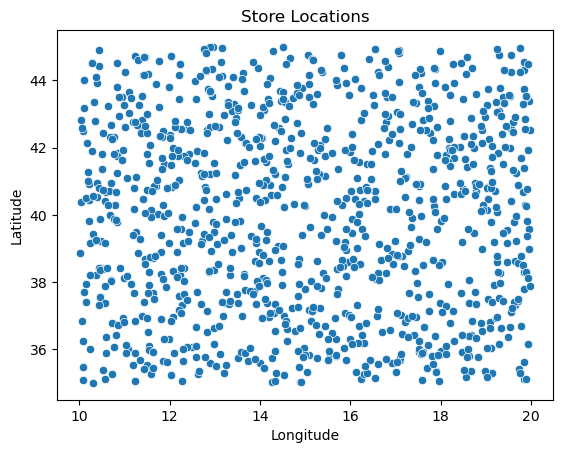

In [52]:
#grafico latitudini e longitudini dei negozi con grafico che parte da 0
sns.scatterplot(data=dfj, x='location_lon', y='location_lat')
plt.title('Store Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()